In [3]:
# library(dplyr)
library(ggplot2)
# library(nortest)
# library(wesanderson)

In [4]:
# Figure 3 R script - Timeliness
fig3 <- read.csv("latency_all.csv",header=TRUE,sep=",")
fig3$log_latency <- ifelse(fig3$latency > 0, log10(fig3$latency), -log10(-fig3$latency))

Warning message in ifelse(fig3$latency > 0, log10(fig3$latency), -log10(-fig3$latency)):
"NaN이 생성되었습니다"Warning message in ifelse(fig3$latency > 0, log10(fig3$latency), -log10(-fig3$latency)):
"NaN이 생성되었습니다"

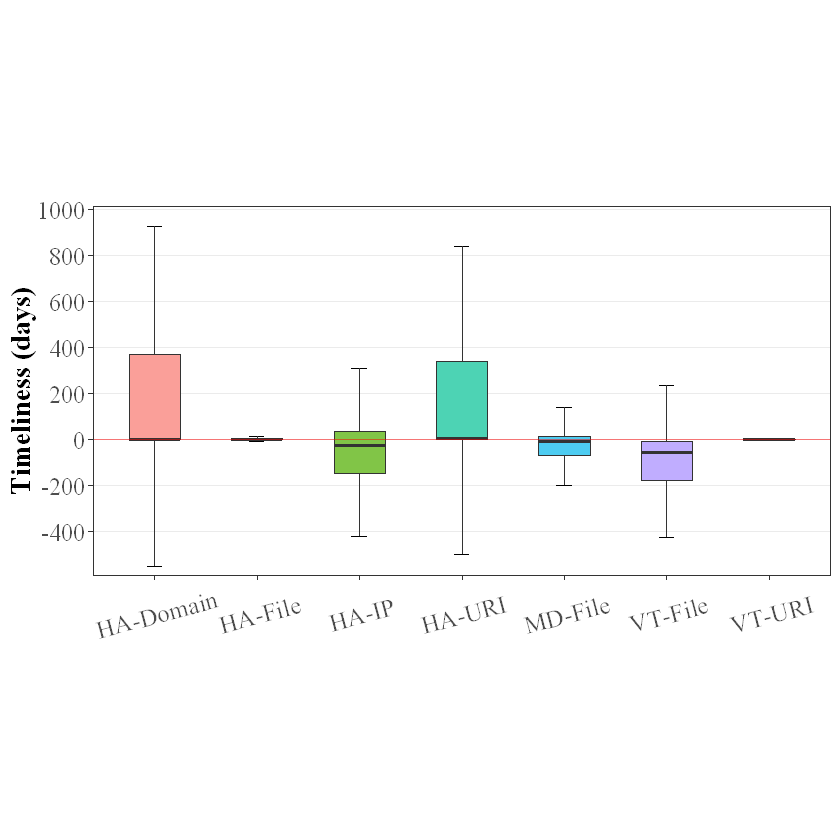

In [6]:
ggplot(fig3, aes(x=label, y=latency, fill=label)) + 
  theme_bw() +
  stat_boxplot(geom = "errorbar", width = 0.15) + 
  scale_fill_manual(values=c("#FA9F99", "#93EB94", "#81C547", "#4DD3B4", "#4DCCF1", "#C0ADFF", "#93EB94")) +
  geom_boxplot(outlier.shape = NA, width = 0.5, show.legend = FALSE) +
  geom_hline(yintercept=0, color = "red", alpha=0.5, size=0.5)+
  theme(# plot.title = element_text(size=17, hjust = 0.5),
        text = element_text(family="serif"),
        axis.text.x = element_text(size = 15, angle=15, 
                                   margin = margin(t=15,r=0,b=-15,l=0)),
        panel.grid.minor.y = element_blank(),
        axis.text.y = element_text(size = 15),
        axis.title.y = element_text(size = 17, face = "bold"),
        # axis.title = element_blank(),
        axis.title.x = element_blank(),
        panel.grid.major.x = element_blank(),
        aspect.ratio = 0.5)+
  coord_cartesian(ylim = quantile(fig3$latency, c(0.039, 0.9988))) +
  scale_y_continuous(breaks=seq(-600, 1000, by=200)) +
  labs(y="Timeliness (days)")

In [7]:
# Figure 4 R script - Improper value - Threat actor, TTP, Malware
fig4 <- read.csv("validity_stix12_2.csv",header=TRUE,sep=",")

level_order <- c('Malware (STIX 2)', 'Threat actor (STIX 2)', 
                 'TTP (STIX 1)', 'Threat actor (STIX 1)')
level_order2 <- c('Correct', 'Incorrect', 'Unmatched')

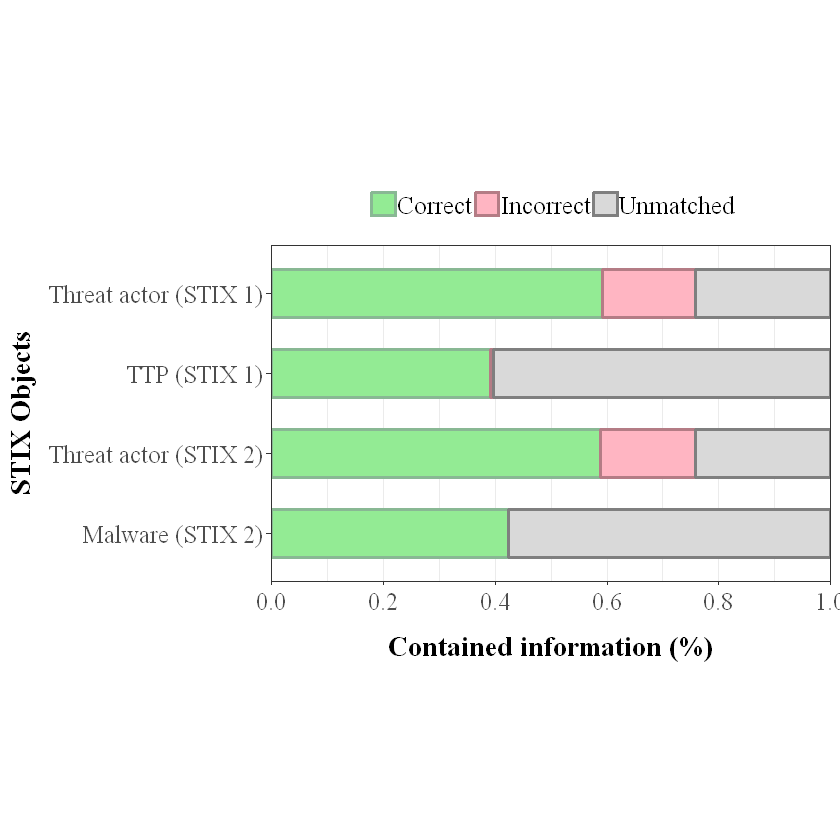

In [8]:
ggplot(data=fig4, aes(x=factor(type, level=level_order),
            y=count,fill=infoin, color=infoin)) +
  theme_bw() +
  coord_flip() +
  geom_bar(stat="identity", position=position_fill(reverse = T),width = 0.6,size=1)+
  scale_fill_manual(values=c("#93EB94","#FFB5C2", "#D9D9D9"), 
                    breaks=c('Correct', 'Incorrect', 'Unmatched')) +
  scale_color_manual(values=c("#89B894", "#B47C85", "#7F7F7F"), 
                     breaks=c('Correct', 'Incorrect', 'Unmatched')) +
  theme(text = element_text(family="serif"),
    axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5, size = 15),
    axis.text.y = element_text(size = 15),
    axis.title = element_text(size = 17,face = "bold"),
    axis.title.y = element_text(margin = margin(t=0,r=10,b=0,l=0)),
    axis.title.x = element_text(margin = margin(t=15,r=0,b=0,l=0)),
    plot.background = element_blank(),
    legend.title = element_blank(),# 
    # legend.title = element_text(size=15),
    legend.text = element_text(size=15),
    legend.key.height= unit(0.6, 'cm'),
    legend.key.width= unit(0.6, 'cm'),
    legend.position = "top",
    aspect.ratio = 0.6)+
  scale_y_continuous(breaks = seq(0,1.0,0.2),
                     expand = expand_scale(mult = 0, add = 0)) +
  labs(y="Contained information (%)", x="STIX Objects")


In [11]:
# Figure 5 R script - Improper value - VirsTotal detection
fig5 <- read.csv("vt_detection_bar_2.csv",header=TRUE,sep=",")

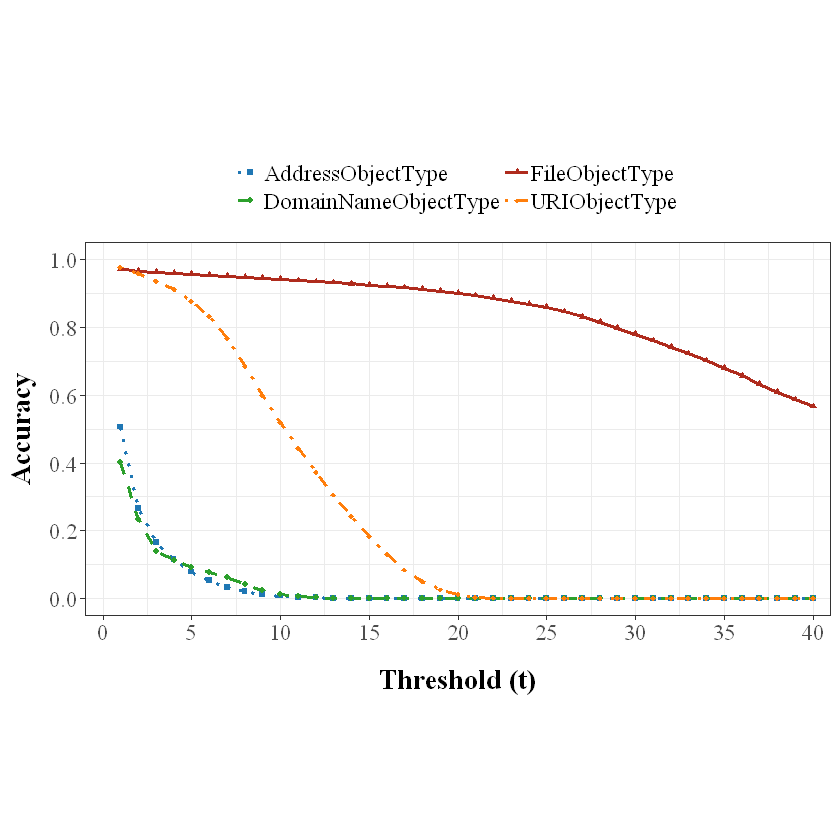

In [12]:
ggplot(fig5,aes(x=threshold,y=ratio,color=category)) + 
  geom_line(aes(linetype=category,group=category),size=1) +
  theme_bw() +
  scale_color_manual(values=c("#1F77B4","#2CA02C", "#AF2B1D","#FF7E0B"))+
  scale_linetype_manual(values = c(3,2,1,4)) +
  scale_shape_manual(values=c(15,16,17,18)) +
  geom_point(data=vt_detection2, aes(shape=category),size=1.3) + 
  theme(text = element_text(family="serif"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 17,face = "bold"),
        axis.title.y = element_text(margin = margin(t=0,r=10,b=0,l=0)),
        axis.title.x = element_text(margin = margin(t=15,r=0,b=0,l=0)),
        legend.title = element_blank(),# 
        legend.text = element_text(size=14),
        legend.position = "top",
        aspect.ratio = 0.5) +
  guides(color = guide_legend(nrow = 2)) +
  scale_y_continuous(breaks=seq(0,1,0.2),limits = c(0,1)) +
  scale_x_continuous(breaks=seq(0,40,5),limits = c(0,40), expand = c(0,1)) +
  labs(y="Accuracy", x="Threshold (t)",fill="Top 7 engines")


In [15]:
fig7 <- read.csv("info_stix.csv",header=TRUE,sep=",")
level_order <- c('Attack pattern', 'Malware instance', 
                 'Threat actor', 'Target information')
level_order2 <- c('AP', 'MI', 'TA', 'TI')

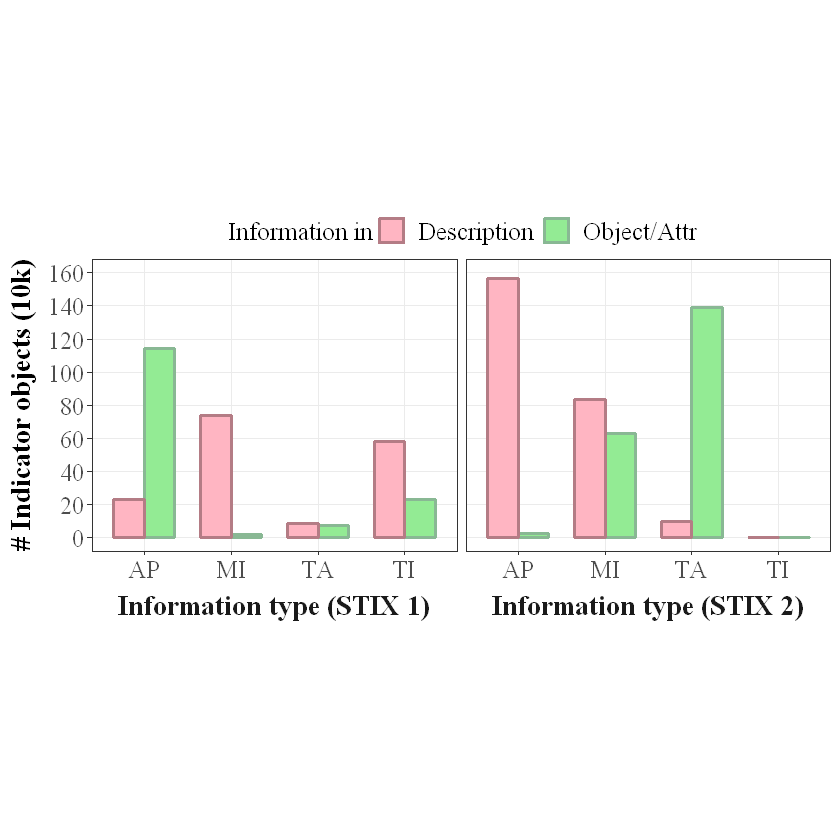

In [16]:
ggplot(data=fig7, aes(x=factor(type, level=level_order2), y=count, fill=infoin, color=infoin)) +
  theme_bw() +
  geom_bar(stat="identity", position=position_dodge(),width = 0.7,size=1)+
  scale_fill_manual(values=c("#FFB5C2", "#93EB94", "#93EB94")) +
  scale_color_manual(values=c("#B47C85", "#89B894", "#89B894")) +
  scale_y_continuous(breaks=seq(0,160,20),limits = c(0,160)) +
  labs(y="# Indicator objects (10k)", x="",x="Information type", 
       fill="Information in", color="Information in") +
  facet_grid(~group, scales = "free_x", switch = "x") +
  theme(# axis.text.x = element_text(angle = 35, vjust = 1, hjust=1, size = 14),
    text = element_text(family="serif"),
    axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15),
    axis.title = element_text(size = 17,face = "bold"),
    axis.title.y = element_text(margin = margin(t=0,r=10,b=0,l=0)),
    axis.title.x = element_text(margin = margin(t=0,r=0,b=-40,l=0)),
    panel.grid.minor.y = element_blank(),
    plot.background = element_blank(),
    legend.title = element_text(size=15),
    legend.text = element_text(size=15),
    legend.position = c(0.5, 1.1),
    legend.background = element_blank(),
    legend.box.background = element_blank(),
    legend.key.height= unit(0.6, 'cm'),
    legend.key.width= unit(0.6, 'cm'),
    legend.direction="horizontal",
    strip.placement = "outside",
    strip.background = element_blank(),
    strip.text = element_text(size=17,face = "bold"),
    aspect.ratio = 0.8)